In [2]:
import pandas as pd

In [26]:
data_ads = pd.read_csv('data/Advertising.csv')

In [4]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
len(data_ads)

200

In [6]:
import numpy as np

In [7]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [8]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [11]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [9]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [12]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr2,corr1
0,230.1,37.8,69.2,22.1,670.896956,65.246006,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,13.122506,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,22.302006,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,20.048006,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1.260006,1139.568806


In [15]:
corrn = sum(data_ads["corrn"]) / np.sqrt(sum(data_ads["corr1"])*sum(data_ads["corr2"]))

In [17]:
corrn # 0.78222442 Correlacion positivo de las ventas con la publiciidad en TV

np.float64(0.7822244248616064)

In [18]:
def corr_coeff(df, var1, var2):
    data_ads["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    data_ads["corr1"] = (df[var1] - np.mean(df[var1]))**2
    data_ads["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"]) / np.sqrt(sum(df["corr1"])*sum(df["corr2"]))
    return corr_p

In [21]:
corr_coeff(data_ads, 'TV', 'Sales')  # 0.78222442

np.float64(0.7822244248616064)

In [27]:
cols = data_ads.columns.values

In [28]:
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [29]:
for x in cols: 
    for y in cols: 
        print(x, y, corr_coeff(data_ads, x, y))

TV TV 1.0
TV Radio 0.05480866446583011
TV Newspaper 0.056647874965057035
TV Sales 0.7822244248616064
Radio TV 0.05480866446583011
Radio Radio 1.0
Radio Newspaper 0.35410375076117534
Radio Sales 0.5762225745710553
Newspaper TV 0.056647874965057035
Newspaper Radio 0.35410375076117534
Newspaper Newspaper 1.0
Newspaper Sales 0.22829902637616536
Sales TV 0.7822244248616064
Sales Radio 0.5762225745710553
Sales Newspaper 0.22829902637616536
Sales Sales 1.0


In [30]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Publicidad en TV vs Ventas')

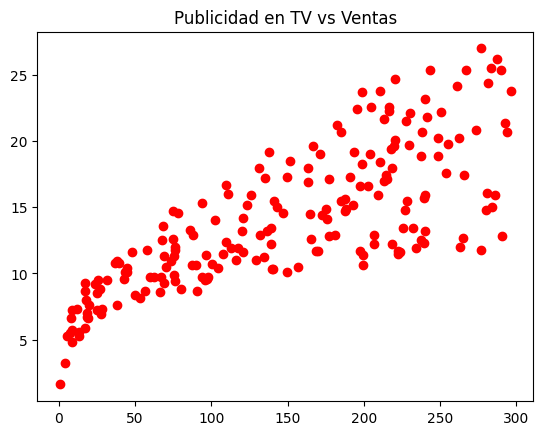

In [32]:
plt.plot(data_ads['TV'], data_ads['Sales'], 'ro')
plt.title('Publicidad en TV vs Ventas')

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

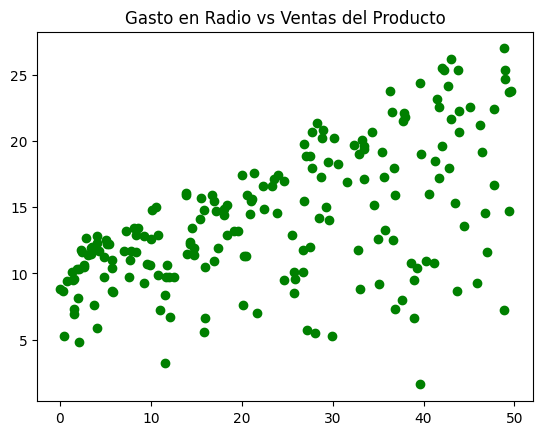

In [37]:
plt.plot(data_ads['Radio'], data_ads['Sales'], 'go')
plt.title('Gasto en Radio vs Ventas del Producto')

Text(0.5, 1.0, 'Gasto en Periodico vs Ventas')

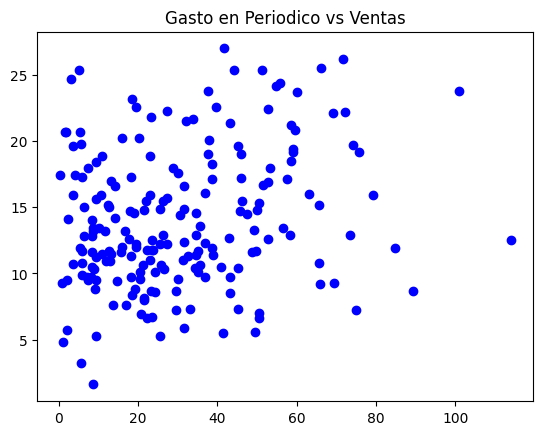

In [36]:
plt.plot(data_ads['Newspaper'], data_ads['Sales'], 'bo')
plt.title('Gasto en Periodico vs Ventas')

In [ ]:
data_ads = pd.read_csv('data/Advertising.csv')
data_ads.corr() # Nos devuelve la matriz de correlacion de todas las variables

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


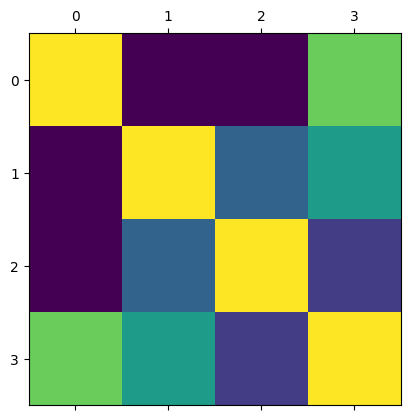

In [40]:
plt.matshow(data_ads.corr())